In [74]:
import numpy as np
import matplotlib.pyplot as plt

import random as random

from scipy.stats import poisson

In [75]:
x_0 = 5
delta = 3

mu = 5

def new_state(x): #Generate a new state that is somewhat in the near of the old one.
    epsilon = round(random.uniform(-delta, delta))
    y = x + epsilon
    return y


def transition_prob(x_old, x_new):
    numerator = poisson.pmf(x_new, mu = mu)

    denominator = poisson.pmf(x_old, mu = mu)

    return numerator/denominator




In [76]:
data = np.zeros(1000)

data[0] = x_0

index = 1
tries = 0

while(index < len(data)):

    current_x = data[index-1]
    y = new_state(current_x)

    trans_prob = min(transition_prob(current_x, y), 1)

    random_number = random.random()

    if(random_number < trans_prob):
        data[index] = y
        index += 1

    tries +=1

print("Acceptance rate: "  + str(round(1000/tries, 3)))

Acceptance rate: 0.733


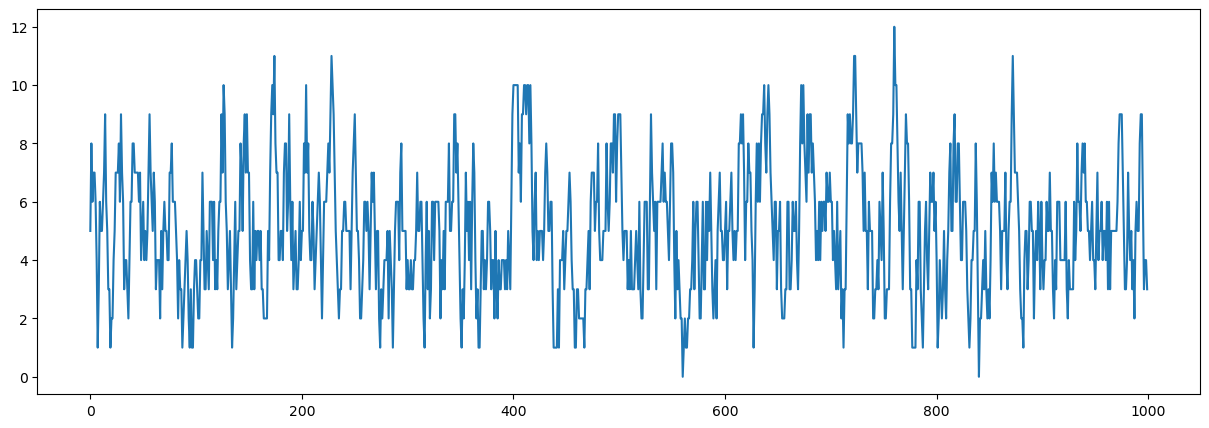

In [77]:
fig, ax = plt.subplots(figsize = (15,5))

ax.plot(data)

(array([  2.,  34.,  70., 150., 154., 186., 174.,  91.,  65.,  48.,  20.,
          6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 [<matplotlib.patches.Polygon at 0x21d4fef1e20>])

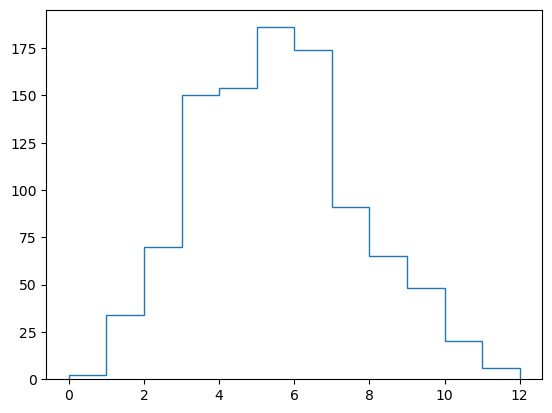

In [82]:
plt.hist(data, bins = round(max(data)), histtype='step')